In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
img = cv.imread('test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

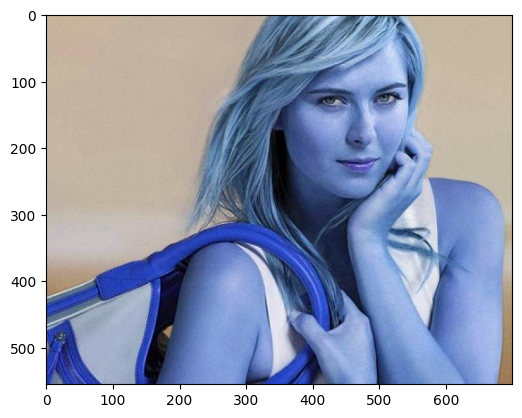

In [3]:
plt.imshow(img)

(555, 700)


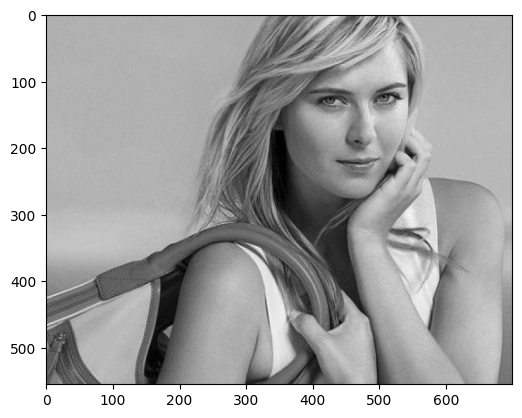

In [7]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')

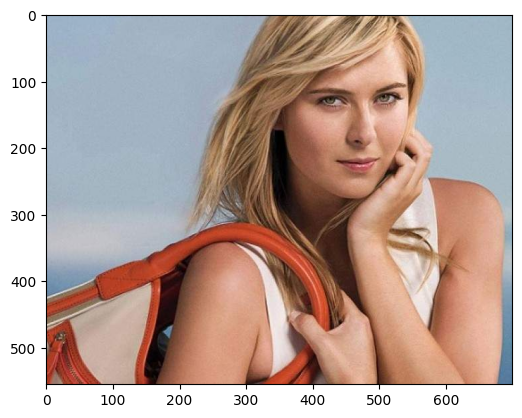

In [10]:
color = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(color)

In [8]:
face_cascade = cv.CascadeClassifier("opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier("opencv\haarcascades\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
faces

array([[352,  38, 233, 233]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

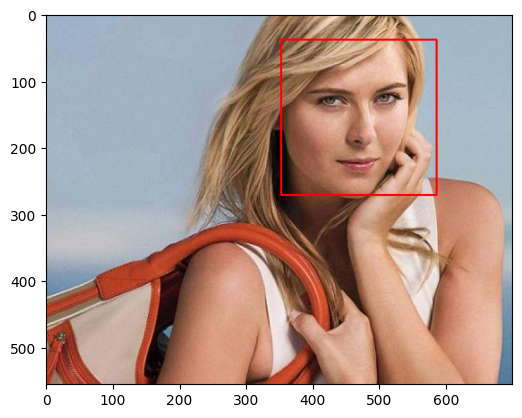

In [11]:
face_img = cv.rectangle(color, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(face_img)

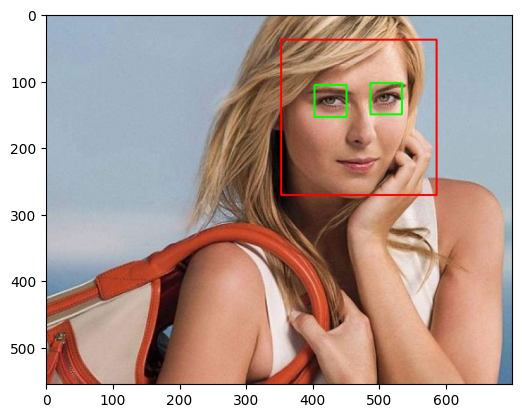

In [11]:
cv.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv.rectangle(color,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
       
plt.figure()
plt.imshow(face_img)
plt.show()

# roi = region of interest

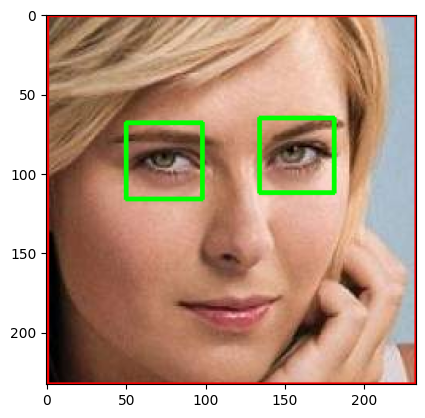

In [12]:
plt.imshow(roi_color)

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

(-0.5, 232.5, 232.5, -0.5)

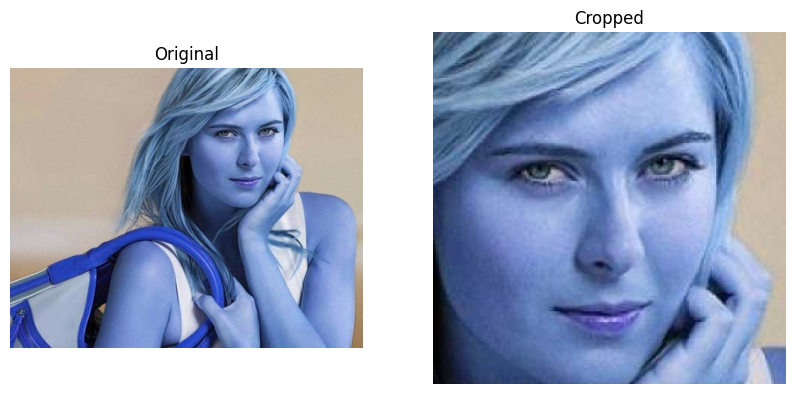

In [14]:
original_img = cv.imread('test_images/sharapova1.jpg')
cropped_img = get_cropped_image_if_2_eyes('test_images/sharapova1.jpg')
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cropped_img)
ax[1].set_title('Cropped')
ax[1].axis('off')

In [37]:
get_cropped_image_if_2_eyes('test_images/sharapova2.jpg')

* Returned None

In [80]:
import os

img_dirs = []
for entry in os.scandir("./dataset/"):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [81]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [107]:
import shutil

if os.path.exists("./dataset/cropped/"):
    shutil.rmtree("./dataset/cropped")   # remove such folders if exists

os.makedirs("./dataset/cropped/")   # create new folders if not exists

In [108]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

In [109]:
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("/")[-1]
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = "./dataset/cropped/" + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print(f"Generating cropped images in folder:  {cropped_folder}")
            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv.imwrite(cropped_file_path, roi_color) 
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [110]:
import numpy as np
import pywt
import cv2 as cv

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor(imArray,cv.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)
    
    return imArray_H

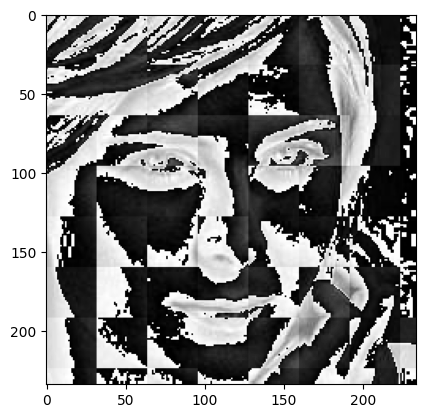

In [111]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [112]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

In [113]:
class_dict = dict()
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1

class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [117]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv.imread(training_image)
        if img is None: continue
        scalled_raw_img = cv.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [118]:
len(X[0])

4096

In [93]:
32*32*3 + 32*32

4096

In [119]:
X = np.array(X).reshape(len(X), 4096).astype(np.float32)
X.shape

(163, 4096)

In [120]:
X[0]

array([ 72., 100., 114., ..., 123., 224., 226.], dtype=float32)

In [95]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [121]:
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)
#pipe = Pipeline([('scalar', StandardScaler()), ('svc', SVC())])

In [122]:
model = SVC().fit(X_train, y_train)
model.score(X_test, y_test)
#pipe.fit(X_train, y_train)
#pipe.score(X_test, y_test)

0.7804878048780488

In [124]:
len(y_test)

41

In [123]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.50      0.43      0.46         7
           2       0.82      0.82      0.82        11
           3       1.00      0.71      0.83         7
           4       0.67      1.00      0.80         4
           5       0.85      0.92      0.88        12

    accuracy                           0.78        41
   macro avg       0.77      0.78      0.76        41
weighted avg       0.79      0.78      0.78        41



In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [141]:
model_params = {
    'svm' : {
        'model' : SVC(gamma = 'auto', probability = True),
        'params' : {
            'svc__C' : [1, 10, 100, 1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
    'random forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1, 5, 10]
        }
    },
    'logistic regression' : {
        'model' : LogisticRegression(solver='liblinear'),
        'params' : {
            'logisticregression__C' : [1, 5, 10]
        }    
    }
}

In [142]:
scores = []
best_estimators = {}
import pandas as pd

for model_name, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.844000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random forest,0.679333,{'randomforestclassifier__n_estimators': 10}
2,logistic regression,0.884667,{'logisticregression__C': 1}


In [143]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [144]:
best_estimators['logistic regression'].score(X_test, y_test)

0.8780487804878049

In [145]:
best_estimators['svm'].score(X_test, y_test)

0.8536585365853658

In [146]:
best_estimators['random forest'].score(X_test, y_test)

0.6829268292682927

In [147]:
best_clf = best_estimators['logistic regression']

In [148]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  1,  0,  0,  1],
       [ 0, 10,  0,  1,  0],
       [ 0,  0,  7,  0,  0],
       [ 0,  1,  0,  3,  0],
       [ 1,  0,  0,  0, 11]], dtype=int64)

Text(120.72222222222221, 0.5, 'Truth')

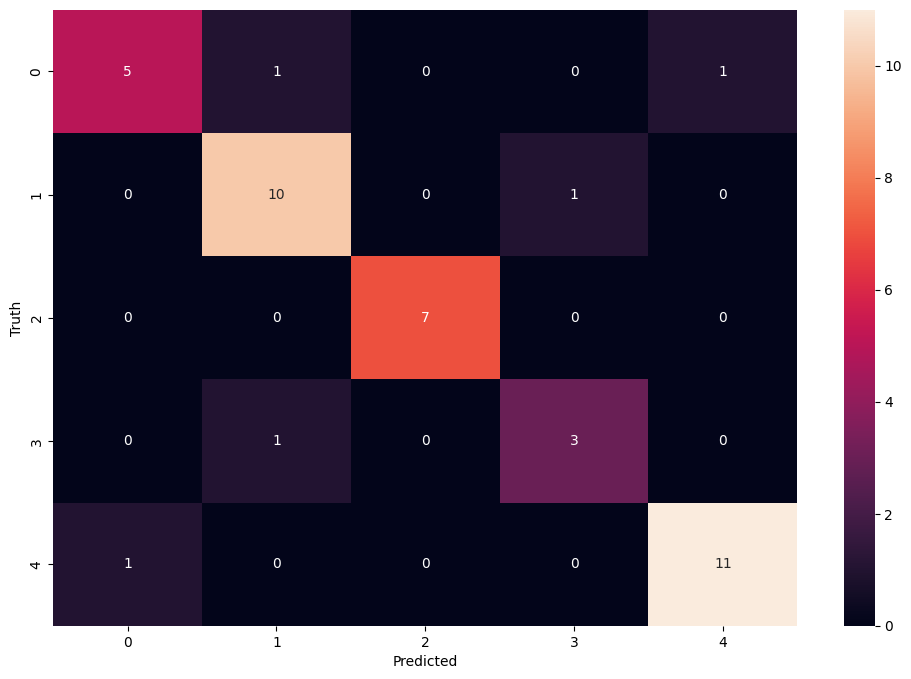

In [149]:
import seaborn as sn
plt.figure(figsize=(12,8))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [151]:
%pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [152]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))